# LUIS for BA Evaluation

### Import packages

In [1]:
import pandas as pd
import json
from pandas import json_normalize
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set(rc={'figure.figsize':(15,15)})
import matplotlib.pyplot as plt 

### Import data

In [3]:
df_scoring = pd.read_csv('2020-07-16-example.txt', sep="\t", encoding="utf-8", index_col=[0]).dropna()

In [4]:
# Set bool for drop
df_scoring['drop_bool'] = ((df_scoring['intent'] == df_scoring['prediction']) & (df_scoring['score'] >= 0.81)) == False

In [5]:
df_scoring.head()

,intent,text,prediction,score,drop,drop_bool
Unnamed: 0,,,,,,
1937,KUG_Anspruchsvoraussetzungen,"Was muss ich erfüllen, um Kurzarbeitergeld zu ...",KUG_Anspruchsvoraussetzungen,0.953330,KUG_Anspruchsvoraussetzungen,False
1677,Teilarbeitslosengeld_Anspruchshoehe,"bin teilarbeitslose, wie viel geld gibt es von...",Teilarbeitslosengeld_Anspruchshoehe,0.928358,Teilarbeitslosengeld_Anspruchshoehe,False
1708,Teilarbeitslosengeld_Beantragung,hiermit beantrage ich teilarbeitslosengeld,Teilarbeitslosengeld_Beantragung,0.970573,Teilarbeitslosengeld_Beantragung,False
1138,ALG_Nettoentgelt_Erklaerung,Was ist Nettogeld?,ALG_Nettoentgelt_Erklaerung,0.862154,ALG_Nettoentgelt_Erklaerung,False
1969,KUG_Weiterfuehrende_Informationen,Ich muss in Kurzarbeit und kenn mich nicht aus,KUG_Weiterfuehrende_Informationen,0.907219,KUG_Weiterfuehrende_Informationen,False


### Classification Report without treshold-caused drop

precision    recall  f1-score   support

                                   ALG_Abfindung       1.00      1.00      1.00         6
               ALG_Aenderung_Anspruchsdauer_2020       1.00      1.00      1.00         6
                   ALG_Anfrage_Bearbeitungsstand       1.00      1.00      1.00         7
             ALG_Anfrage_Unterlagen_vollstaendig       1.00      1.00      1.00         7
                       ALG_Anrechnung_Leistungen       0.88      1.00      0.93         7
                        ALG_Anspruchsbedingungen       1.00      1.00      1.00         8
                              ALG_Anspruchsdauer       1.00      1.00      1.00         6
                              ALG_Anspruchshoehe       1.00      1.00      1.00         7
                           ALG_Arbeitslos_melden       0.67      1.00      0.80         8
                       ALG_Arbeitssuchend_melden       1.00      1.00      1.00         5
                                ALG_Aussteuerung       1.00

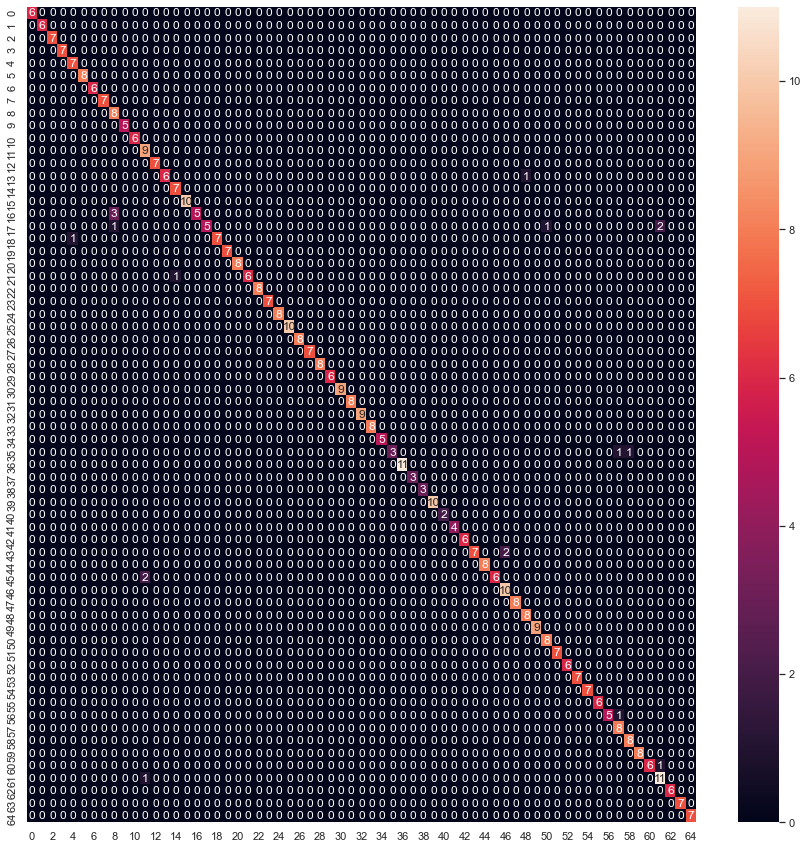

In [6]:
print(classification_report(df_scoring.intent, df_scoring.prediction))
sns.heatmap(confusion_matrix(df_scoring.intent, df_scoring.prediction), annot=True)

### Classification Report with treshold-caused drop

precision    recall  f1-score   support

                                   ALG_Abfindung       1.00      1.00      1.00         6
               ALG_Aenderung_Anspruchsdauer_2020       1.00      1.00      1.00         6
                   ALG_Anfrage_Bearbeitungsstand       1.00      1.00      1.00         7
             ALG_Anfrage_Unterlagen_vollstaendig       1.00      1.00      1.00         7
                       ALG_Anrechnung_Leistungen       0.88      1.00      0.93         7
                        ALG_Anspruchsbedingungen       1.00      1.00      1.00         8
                              ALG_Anspruchsdauer       1.00      1.00      1.00         6
                              ALG_Anspruchshoehe       1.00      1.00      1.00         7
                           ALG_Arbeitslos_melden       0.67      1.00      0.80         8
                       ALG_Arbeitssuchend_melden       1.00      1.00      1.00         5
                                ALG_Aussteuerung       1.00

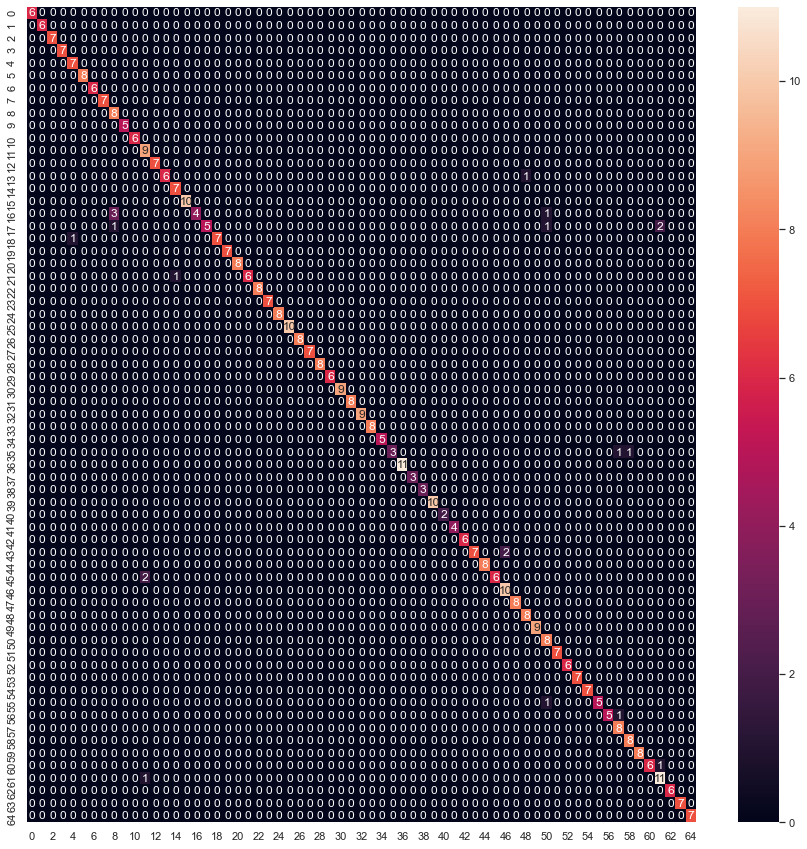

In [7]:
print(classification_report(df_scoring.intent, df_scoring['drop']))
sns.heatmap(confusion_matrix(df_scoring.intent, df_scoring['drop']), annot=True)

#### Wrong Classifications

In [8]:
display(df_scoring[~(df_scoring.intent == df_scoring.prediction)])

,intent,text,prediction,score,drop,drop_bool
Unnamed: 0,,,,,,
458,ALG_Mitteilung_Ortsabwesenheit,ich fahre weg und möchte das mitteilen,Veraenderungsmitteilung_eService_Bankverbindung,0.877543,Veraenderungsmitteilung_eService_Bankverbindung,True
1184,Teilarbeitslosengeld_Anspruchshoehe,Was bekomme ich denn an Geld für Teilarbeitslos?,Teilarbeitslosengeld_Beantragung,0.881090,Teilarbeitslosengeld_Beantragung,True
1467,ALG_Meldung_Wann,"wann muss ich melden, dass ich keinen job mehr...",ALG_Arbeitslos_melden,0.981923,ALG_Arbeitslos_melden,True
593,KUG_Auszahlung,wann überweist ihr mein kug?,ALG_Auszahlung,0.978862,ALG_Auszahlung,True
455,ALG_Mitteilung_Ortsabwesenheit,beantragung ortabwesenheit,None,0.925384,None,True
255,ALG_Nebeneinkommen,wird mein nebeneinkommen beim arbeitslosengeld...,ALG_Anrechnung_Leistungen,0.942342,ALG_Anrechnung_Leistungen,True
1270,ALG_Mitteilung_Ortsabwesenheit,Arbeitslos und Urlaub?,ALG_Arbeitslos_melden,0.893481,ALG_Arbeitslos_melden,True
972,Dialog_Teilarbeitslosengeld_Anspruchsbedingungen,"ich möchte teilarbeitslosengeld beantragen, ge...",Teilarbeitslosengeld_Beantragung,0.981907,Teilarbeitslosengeld_Beantragung,True
1024,ALG_Meldung_Wann,"Wann muss ich melden, dass ich arbeitslos bin?",ALG_Arbeitslos_melden,0.961379,ALG_Arbeitslos_melden,True


ALG_Mitteilung_Ortsabwesenheit                      4
ALG_Meldung_Wann                                    3
Dialog_Teilarbeitslosengeld_Anspruchsbedingungen    2
KUG_Auszahlung                                      2
KUG_Anspruchsvoraussetzungen                        2
ALG_Nebeneinkommen                                  1
Teilarbeitslosengeld_Anspruchshoehe                 1
ALG_Beitraege_Sozialversicherungen                  1
Veraenderungsmitteilung_eService_Bankverbindung     1
Veraenderungsmitteilung_Umzug                       1
ALG_Sperrzeit_Krankenversicherung                   1
Name: intent, dtype: int64


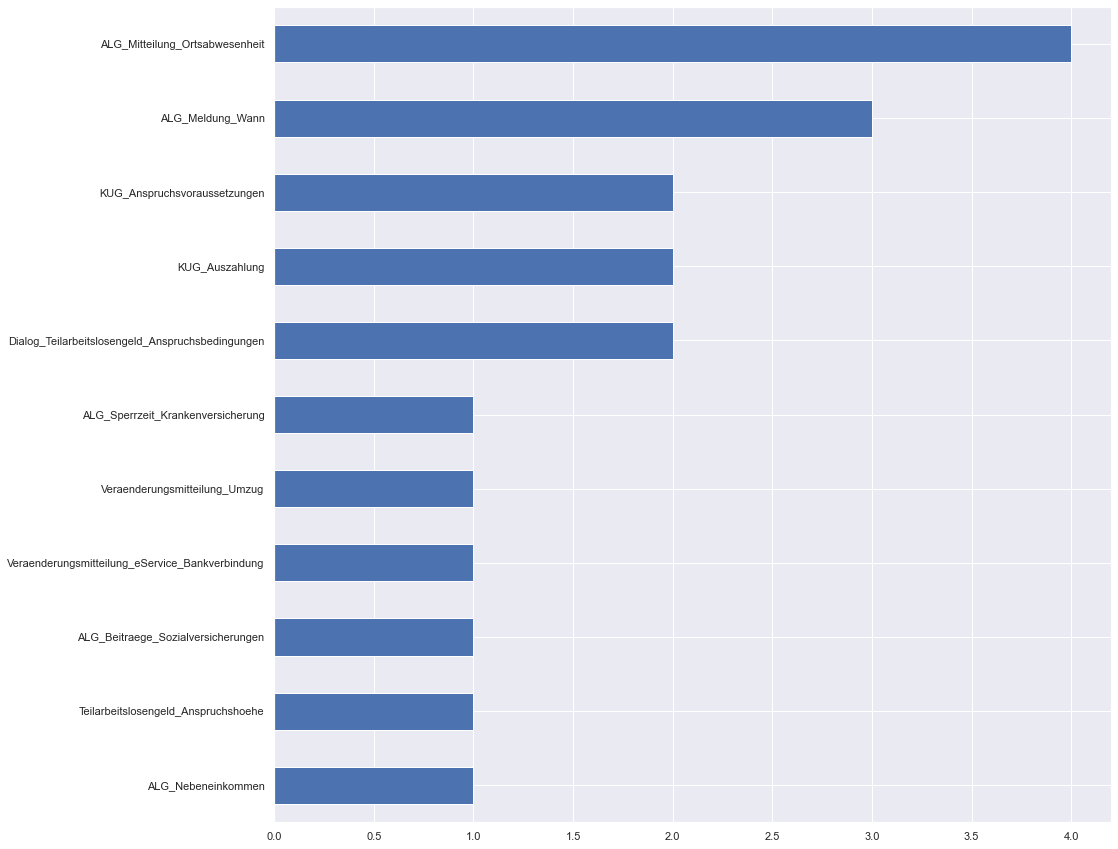

In [9]:
# Frequently misclassified values
print(df_scoring[~(df_scoring.intent == df_scoring.prediction)]['intent'].value_counts())
df_scoring[~(df_scoring.intent == df_scoring.prediction)]['intent'].value_counts().sort_values().plot(kind = 'barh')

In [10]:
df_scoring[~(df_scoring.intent == df_scoring.prediction) & (df_scoring.intent == 'SmallTalk_Any')]['prediction'].value_counts()

Series([], Name: prediction, dtype: int64)

In [11]:
# Investigate cases for most frequently misclassified class
df_scoring[~(df_scoring.intent == df_scoring.prediction) & (df_scoring.intent == 'Veraenderungsmitteilung_eService_Bankverbindung')]

,intent,text,prediction,score,drop,drop_bool
Unnamed: 0,,,,,,
409,Veraenderungsmitteilung_eService_Bankverbindung,mein arbeitslosengeld soll auf ein anderes kon...,ALG_Auszahlung,0.899479,ALG_Auszahlung,True


### Bad scores, but correctly classified

In [12]:
display(df_scoring[(df_scoring.score < 0.82) & (df_scoring.intent == df_scoring.prediction)])

,intent,text,prediction,score,drop,drop_bool
Unnamed: 0,,,,,,
1684,Teilarbeitslosengeld_Anspruchsdauer,brauche länger teilweises arbeitslosengeld,Teilarbeitslosengeld_Anspruchsdauer,0.777343,None,True
1026,ALG_Meldung_Wann,Welche Fristen gibts fürs Arbeitslosengeld?,ALG_Meldung_Wann,0.813398,None,False


(0.0, 1.0)

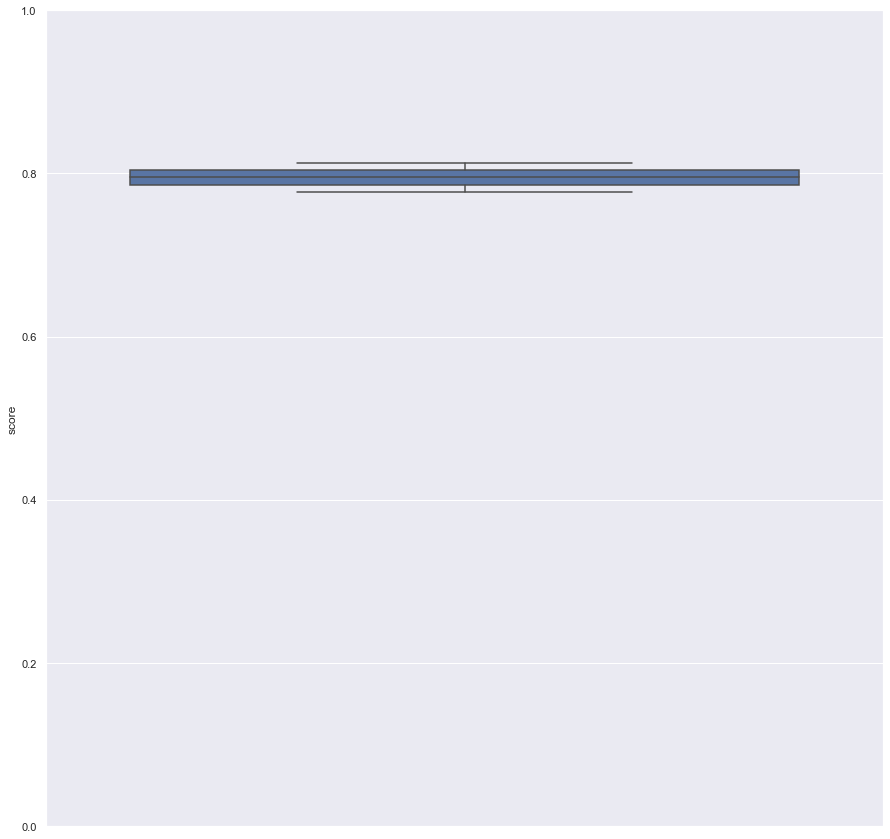

In [13]:
# Distribution of bad scores but correctly classified
am = sns.boxplot(y='score', data=df_scoring[(df_scoring.score < 0.82) & (df_scoring.intent == df_scoring.prediction)])
am.set_ylim([0, 1])

In [14]:
# Most frequent correct classifications even tho having bad confidence scores
df_scoring[(df_scoring.score < 0.82) & (df_scoring.intent == df_scoring.prediction)]['prediction'].value_counts()

Teilarbeitslosengeld_Anspruchsdauer    1
ALG_Meldung_Wann                       1
Name: prediction, dtype: int64

### Good scores, but wrongly classified

In [15]:
print('Good scores, but wrongly classified')
display(df_scoring[(df_scoring.score > 0.82) & (df_scoring.intent != df_scoring.prediction)].head())#.boxplot(column=['score'])

Good scores, but wrongly classified


,intent,text,prediction,score,drop,drop_bool
Unnamed: 0,,,,,,
458,ALG_Mitteilung_Ortsabwesenheit,ich fahre weg und möchte das mitteilen,Veraenderungsmitteilung_eService_Bankverbindung,0.877543,Veraenderungsmitteilung_eService_Bankverbindung,True
1184,Teilarbeitslosengeld_Anspruchshoehe,Was bekomme ich denn an Geld für Teilarbeitslos?,Teilarbeitslosengeld_Beantragung,0.881090,Teilarbeitslosengeld_Beantragung,True
1467,ALG_Meldung_Wann,"wann muss ich melden, dass ich keinen job mehr...",ALG_Arbeitslos_melden,0.981923,ALG_Arbeitslos_melden,True
593,KUG_Auszahlung,wann überweist ihr mein kug?,ALG_Auszahlung,0.978862,ALG_Auszahlung,True
455,ALG_Mitteilung_Ortsabwesenheit,beantragung ortabwesenheit,None,0.925384,None,True


(0.0, 1.0)

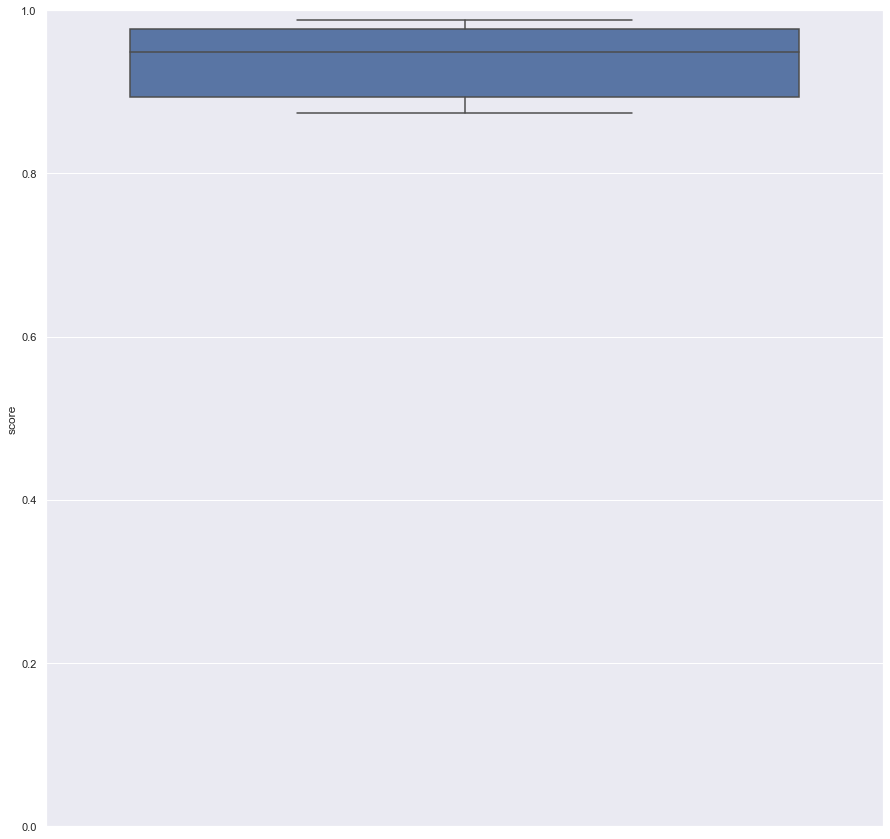

In [16]:
# Distribution of good scores but wrongly classified
ax = sns.boxplot(y='score', data=df_scoring[(df_scoring.score > 0.82) & (df_scoring.intent != df_scoring.prediction)])
ax.set_ylim([0, 1])

### Scores comparison drop vs. non drop

(0.0, 1.01)

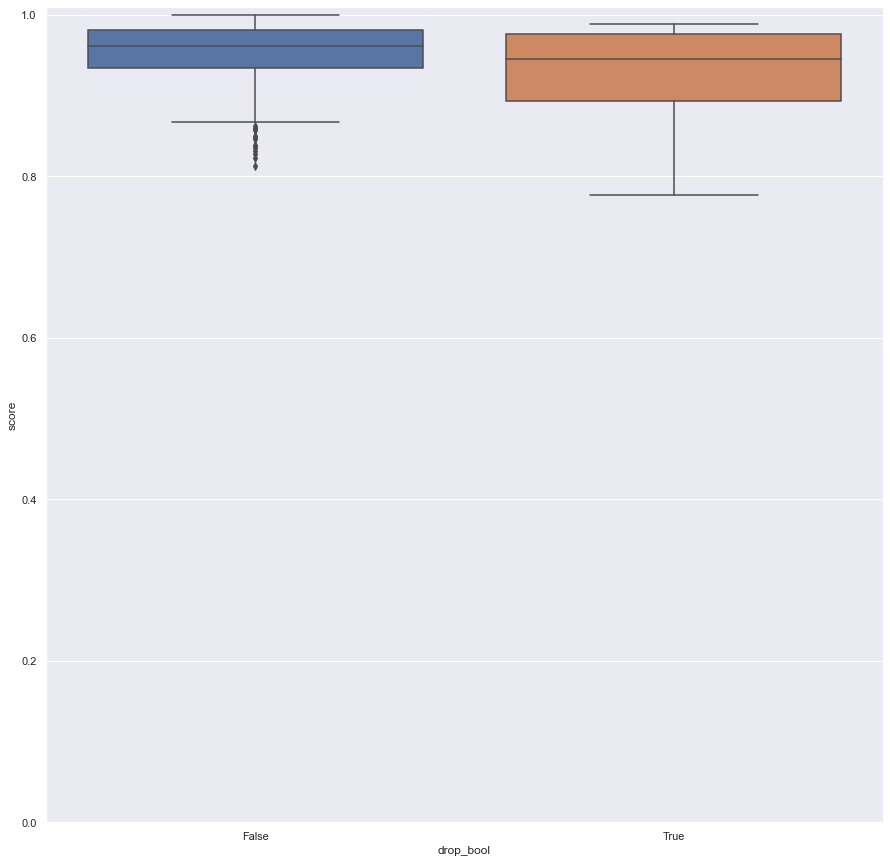

In [17]:
ay = sns.boxplot(x="drop_bool", y="score", data=df_scoring)
ay.set_ylim([0, 1.01])
# todo distribution / density